In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu
df_mean = pd.read_csv('Melbourne_housing_FULL.csv')
df_median = pd.read_csv('Melbourne_housing_FULL.csv')
df_mode = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
# Kiểm tra thông tin dữ liệu
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
# Mô tả dữ liệu
df_mean.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionname       0.000086
Propertycount    0.000086
dtype: float64

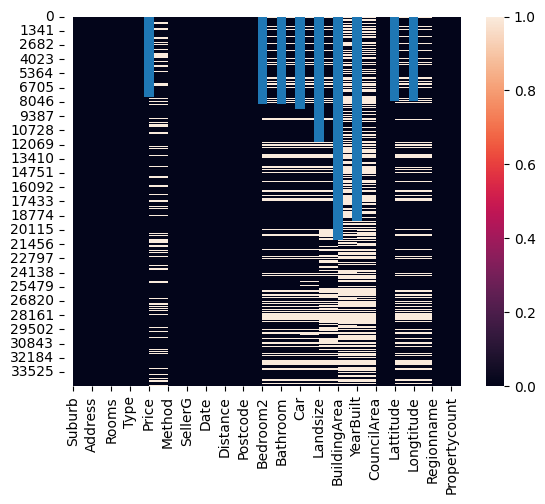

In [5]:
# Vẽ biểu đồ heatmap cho các giá trị null
sns.heatmap(df_mean.isnull())
df_mean.isnull().sum().plot.bar()
df_mean.isnull().sum() / df_mean.shape[0]

In [6]:
# Sao lưu dữ liệu gốc
dfBackup = df_mean.copy()

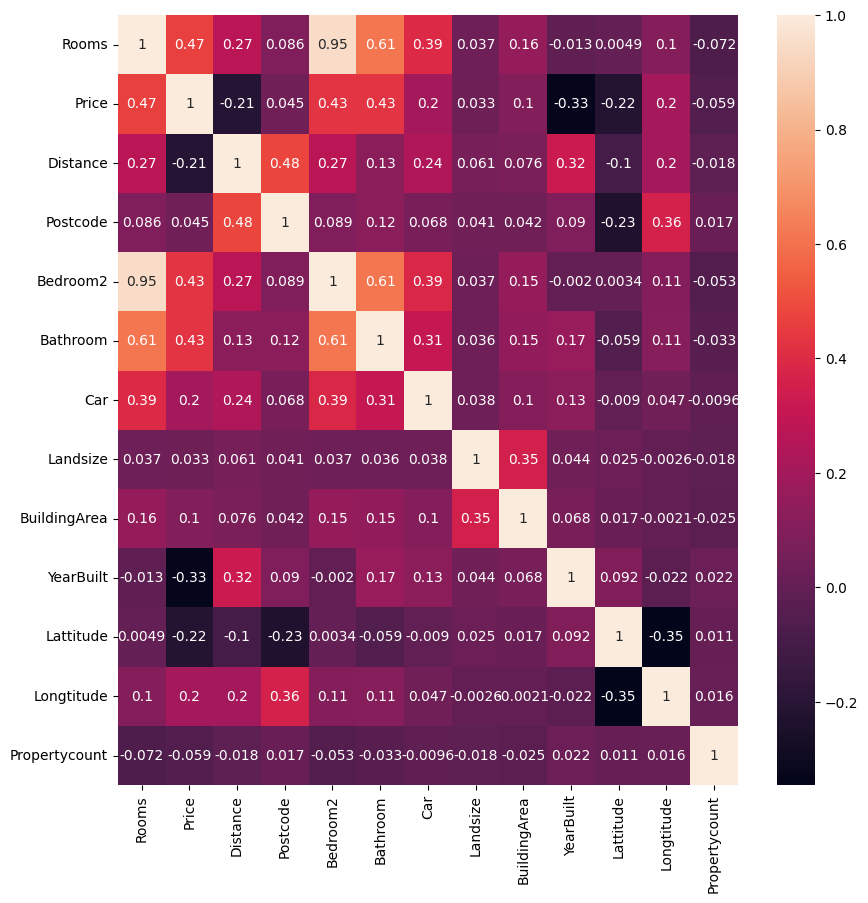

In [7]:
# Vẽ heatmap tương quan
plt.figure(figsize=(10, 10))
sns.heatmap(dfBackup.corr(numeric_only=True), annot=True)
plt.show()

In [8]:
# Phân loại các cột số và cột phân loại
numerical_features_mean = df_mean.select_dtypes(include='number').columns.tolist()
numerical_features_median = df_median.select_dtypes(include='number').columns.tolist()
numerical_features_mode = df_mode.select_dtypes(include='number').columns.tolist()

categorical_features_mean = df_mean.select_dtypes(exclude='number').columns.tolist()
categorical_features_median = df_median.select_dtypes(exclude='number').columns.tolist()
categorical_features_mode = df_mode.select_dtypes(exclude='number').columns.tolist()

In [9]:
# Hàm điền khuyết bằng mean
def fill_missing_values_mean(numerical_features_mean):
    for feature_name in numerical_features_mean:
        df_mean[feature_name] = df_mean[feature_name].fillna(value=df_mean[feature_name].mean())
        print(f"Filled missing values in {feature_name} using mean.")


In [10]:
# Hàm điền khuyết bằng median
def fill_missing_values_median(numerical_features_median):
    for feature_name in numerical_features_median:
        df_median[feature_name] = df_median[feature_name].fillna(value=df_median[feature_name].median())
        print(f"Filled missing values in {feature_name} using median.")

In [11]:
# Hàm điền khuyết bằng mode
def fill_missing_values_mode(numerical_features_mode):
    for feature_name in numerical_features_mode:
        df_mode[feature_name] = df_mode[feature_name].fillna(value=df_mode[feature_name].mode()[0])
        print(f"Filled missing values in {feature_name} using mode.")


In [12]:
# Điền khuyết cho các cột phân loại bằng mode
def fill_missing_categorical_values_mode(categorical_features_mean):
    for feature_name in categorical_features_mean:
        df_mean[feature_name] = df_mean[feature_name].fillna(value=df_mean[feature_name].mode()[0])
        print(f"Filled missing values in categorical column {feature_name} using mode.")

In [13]:
# Điền khuyết bằng mean, median, mode
fill_missing_values_mean(numerical_features_mean)
fill_missing_values_median(numerical_features_median)
fill_missing_values_mode(numerical_features_mode)
fill_missing_categorical_values_mode(categorical_features_mean)

Filled missing values in Rooms using mean.
Filled missing values in Price using mean.
Filled missing values in Distance using mean.
Filled missing values in Postcode using mean.
Filled missing values in Bedroom2 using mean.
Filled missing values in Bathroom using mean.
Filled missing values in Car using mean.
Filled missing values in Landsize using mean.
Filled missing values in BuildingArea using mean.
Filled missing values in YearBuilt using mean.
Filled missing values in Lattitude using mean.
Filled missing values in Longtitude using mean.
Filled missing values in Propertycount using mean.
Filled missing values in Rooms using median.
Filled missing values in Price using median.
Filled missing values in Distance using median.
Filled missing values in Postcode using median.
Filled missing values in Bedroom2 using median.
Filled missing values in Bathroom using median.
Filled missing values in Car using median.
Filled missing values in Landsize using median.
Filled missing values in Bu

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

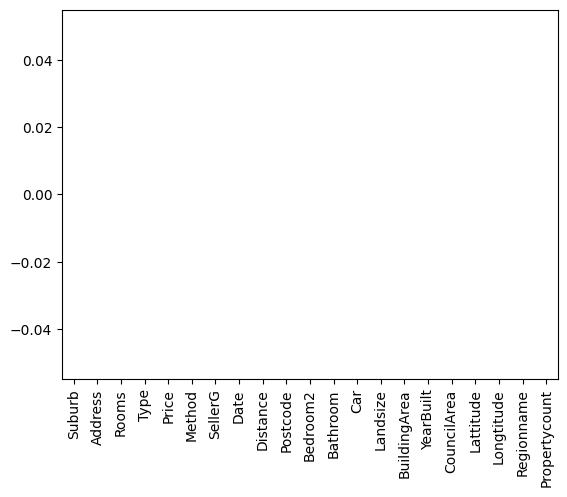

In [14]:
# Kiểm tra lại số lượng null sau khi điền khuyết
df_mean.isnull().sum().plot.bar()
df_mean.isnull().sum() / df_mean.shape[0]

In [15]:
# Biểu đồ phân bố cho các cột liên tục
def plot_continuous_distribution(data, column_name):
    """
    Vẽ biểu đồ phân bố tần suất với biểu đồ tần suất và đường mật độ cho một cột liên tục.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name].dropna(), bins=30, edgecolor='black', color='lightblue', density=True, label='Frequency')
    data[column_name].dropna().plot(kind='density', color='red', label='Density Line')
    plt.xlabel(f"{column_name} (units)")
    plt.ylabel("Density")
    plt.title(f"Distribution of {column_name} Column")
    plt.legend()
    plt.show()

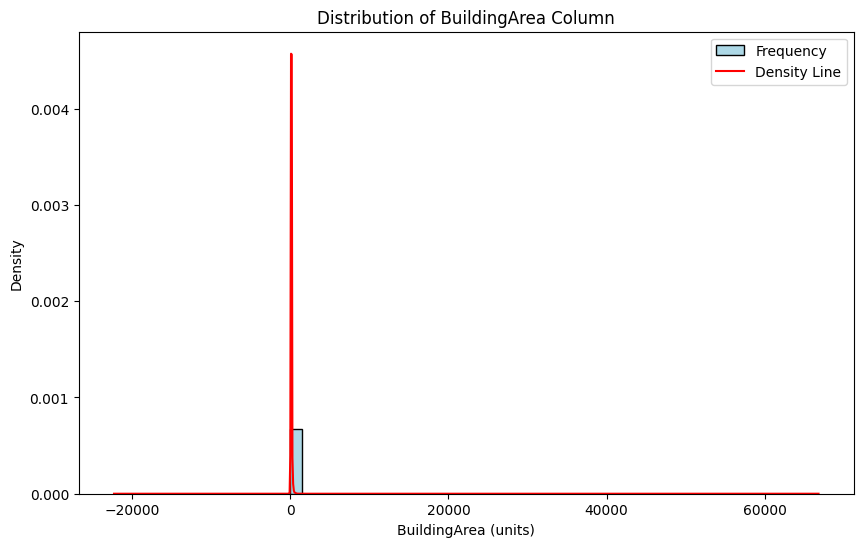

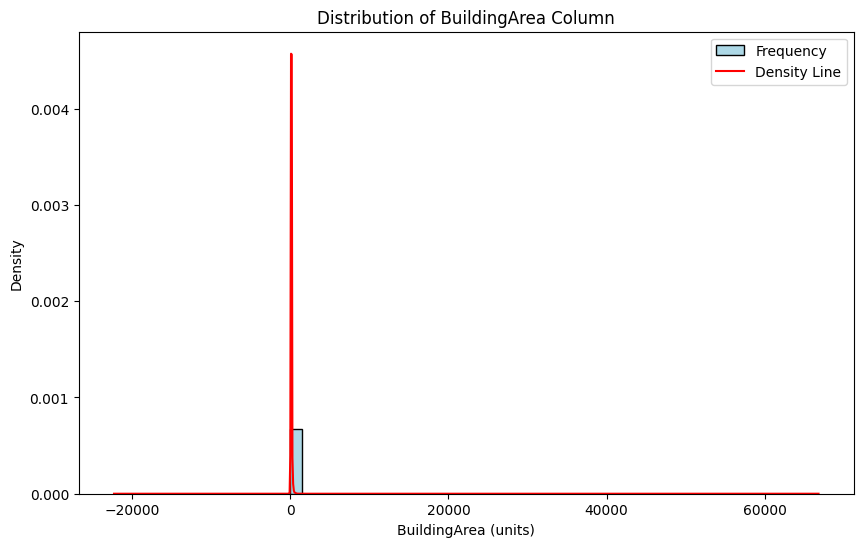

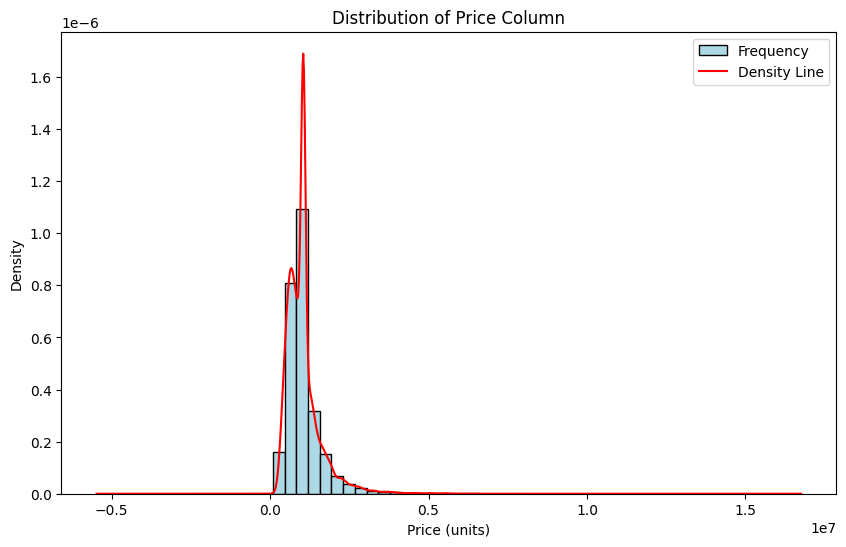

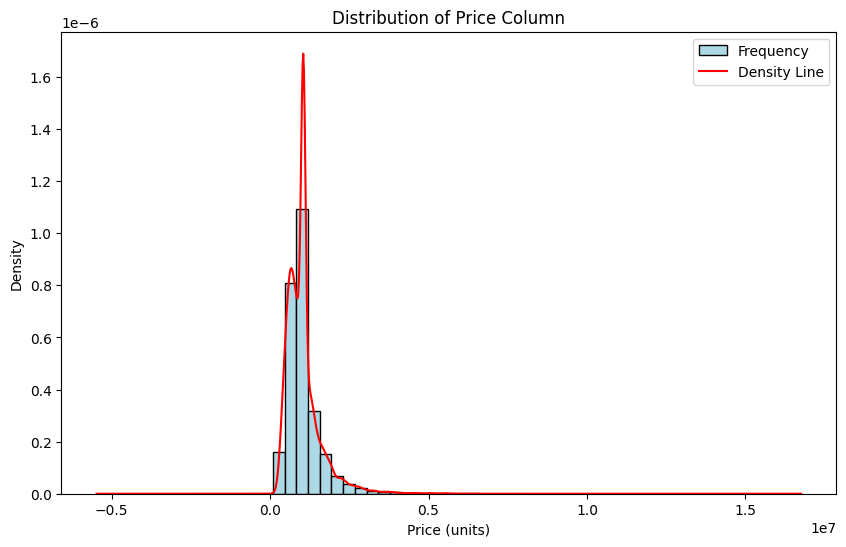

In [16]:
# Biểu đồ phân bố trước và sau khi điền khuyết cho các cột
plot_continuous_distribution(df_mean, 'BuildingArea')
df_mean['BuildingArea'] = df_mean['BuildingArea'].fillna(value=df_mean['BuildingArea'].mean())
plot_continuous_distribution(df_mean, 'BuildingArea')

plot_continuous_distribution(df_mean, 'Price')
df_mean['Price'] = df_mean['Price'].fillna(value=df_mean['Price'].median())
plot_continuous_distribution(df_mean, 'Price')

In [17]:
# Biểu đồ phân phối với đường biểu diễn cho các cột phân loại
def plot_distribution_with_line_overlay(data, column_name):
    """
    Vẽ biểu đồ phân bố tần suất với biểu đồ cột và đường biểu diễn cho một cột nhất định.
    """
    value_counts = data[column_name].value_counts().sort_index()
    values = value_counts.index
    frequencies = value_counts.values
    plt.figure(figsize=(10, 6))
    plt.bar(values, frequencies, color='lightblue', edgecolor='black', label='Frequency')
    plt.plot(values, frequencies, color='red', marker='o', label='Line Overlay')
    plt.xlabel(f"Values of {column_name}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column_name} Column with Line Overlay")
    plt.legend()
    plt.show()

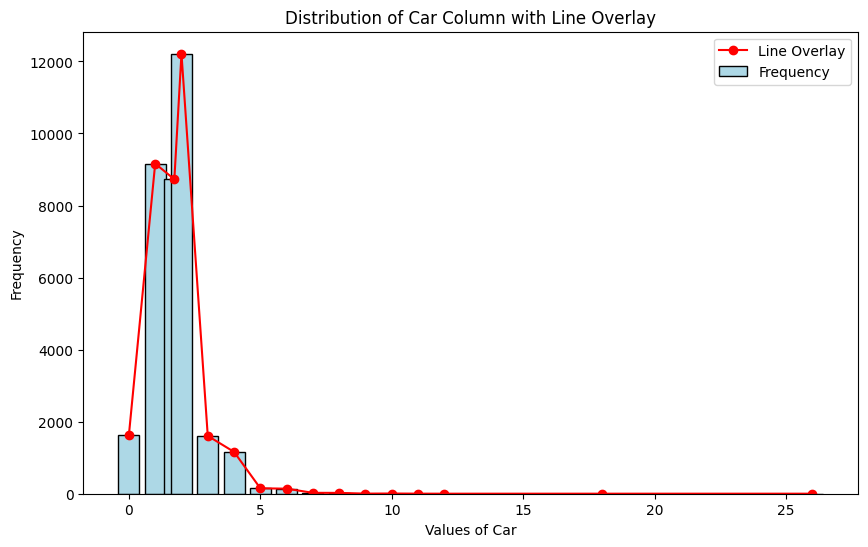

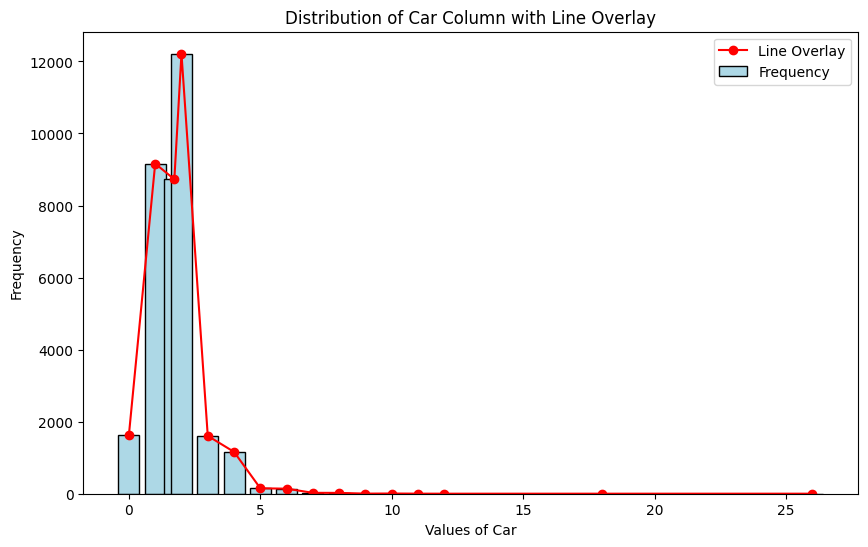

In [18]:
# Điền khuyết giá trị thiếu cho cột phân loại và vẽ biểu đồ phân phối
plot_distribution_with_line_overlay(df_mean, 'Car')
df_mean['Car'] = df_mean['Car'].fillna(value=df_mean['Car'].mode()[0])
plot_distribution_with_line_overlay(df_mean, 'Car')

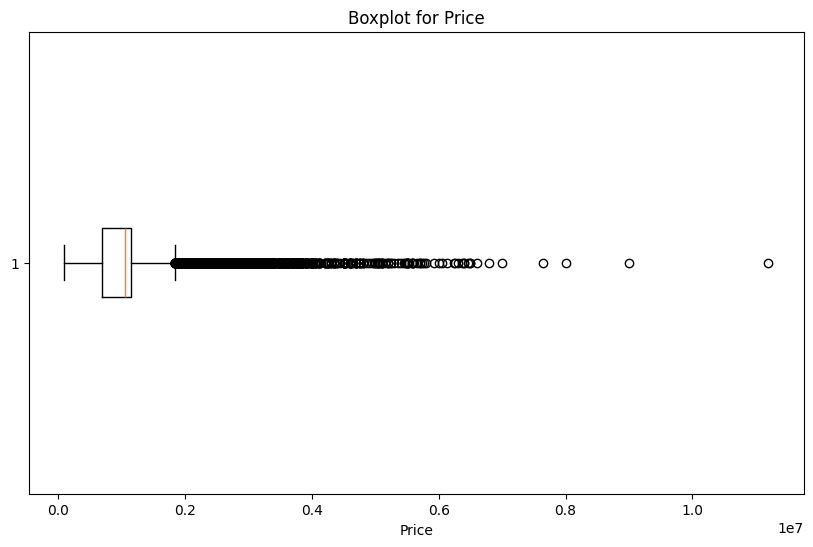

In [19]:
# Biểu đồ boxplot để phát hiện outliers
def plot_boxplot_for_outliers(data, column_name):
    """
    Vẽ biểu đồ boxplot để phát hiện outliers cho một cột.
    """
    plt.figure(figsize=(10, 6))
    plt.boxplot(x=data[column_name].dropna(), vert=False)
    plt.xlabel(column_name)
    plt.title(f'Boxplot for {column_name}')
    plt.show()

plot_boxplot_for_outliers(df_mean, 'Price')

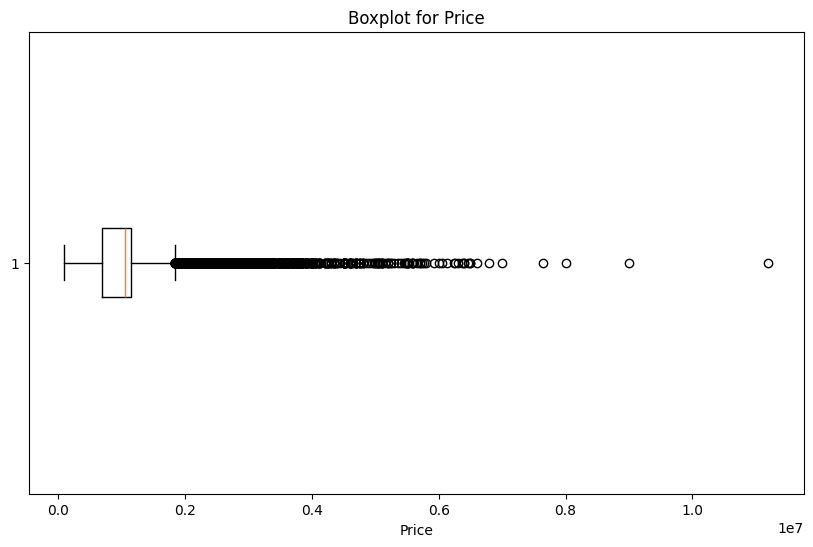

In [20]:
# Sau khi điền khuyết giá trị thiếu cho Price, vẽ lại biểu đồ boxplot
price = df_mean['Price'].median()
df_mean['Price'] = df_mean['Price'].fillna(value=price)
plot_boxplot_for_outliers(df_mean, 'Price')